In [34]:
Filename = "test"
freq = 450   #Frequency in MHz
meshsize = 0.1
numberCells = 5
freq_sim = 450
beta = 1

#Geometry in cm!!!!!
#input for Superfish

Rx1=4.333
Ry1=5.489
Rx2=12.13
Ry2=12.13
Req=29.842
Riris=12.133
Lcell=16.64

Rx1_FPC=4.333
Ry1_FPC=5.489
Rx2_FPC=12.13
Ry2_FPC=12.13
Req_FPC=29.842
Riris_FPC=12.133
Lcell_FPC=16.64

Rx1_PU=4.333
Ry1_PU=5.489
Rx2_PU=12.13
Ry2_PU=12.13
Req_PU=29.842
Riris_PU=12.133
Lcell_PU=16.64




enlargedBP_PU = 1
Rbeampipe_PU = Req
Requator_PUBP = Rbeampipe_PU
Rx1_PUBP=4.333
Ry1_PUBP=5.489
Rx2_PUBP=12.13
Ry2_PUBP=12.13
Riris_PUBP=Riris_PU
Lcell_PUBP=16.64


enlargedBP_FPC = 1
Rbeampipe_FPC = Req
Requator_FPCBP = Rbeampipe_FPC
Rx1_FPCBP=4.333
Ry1_FPCBP=5.489
Rx2_FPCBP=12.13
Ry2_FPCBP=12.13
Riris_FPCBP= Riris_FPC
Lcell_FPCBP=16.64


L_BP_FPC =25
L_BP_PU =25





alpha_accuracy = 0.0001


function CellAlpha1(x1,y1,x2,y2,eqR,IrisR,CellLength)
    slope1 = 0.01
    slope2 = 123123.1
    alpha = 0.0
    alpha1 = 0.0
    alpha2 = 0.0
    if x1 + x2 < CellLength
            alpha = -pi/2
        while abs(slope1-slope2) > alpha_accuracy

            alpha = alpha + alpha_accuracy
            alpha1 = pi/2 + atan(x1/y1 * tan(alpha))
            slope1 = y1 / x1 * tan(alpha1 - pi/2)
            alpha2 = atan(slope1*x2/y2) + pi/2
            slope2 = ((IrisR + y1*(1-sin(alpha1)))-(eqR - y2*(1- sin(alpha2))))/(CellLength-x1*cos(alpha1)-x2*cos(alpha2))
        end
    elseif x1 + x2 == CellLength
        alpha1 = pi/2
        alpha2 = pi/2
    else 
        alpha = pi/2
        while abs(slope2 - slope1) > alpha_accuracy
            alpha = alpha + alpha_accuracy
            alpha1 = pi/2 + atan(x1/y1 * tan(alpha))
            slope1 = y1 / x1 * tan(alpha1 - pi/2)
            alpha2 = atan(slope1*x2/y2) + pi/2
            slope2 = ((IrisR + y1*(1-sin(alpha1)))-(eqR - y2*(1- sin(alpha2))))/(CellLength-x1*cos(alpha1)-x2*cos(alpha2))
        end
    end
    return alpha1, alpha2
end
Filename = string(Filename,"_$(numberCells)Cell")


"test_5Cell"

In [35]:
scale = freq_sim/freq

1.0

In [ ]:
Req = Req*scale
Riris = Riris*scale
Rx1 = Rx1*scale
Ry1 = Ry1*scale
Rx2 = Rx2*scale
Ry2 = Ry2*scale
Lcell = Lcell*scale

Rbeampipe = Rbeampipe*scale

Riris_FPC = Riris_FPC*scale
Rx1_FPC = Rx1_FPC*scale
Ry1_FPC = Ry1_FPC*scale
Rx2_FPC = Rx2_FPC*scale
Ry2_FPC = Ry2_FPC*scale
Lcell_FPC = Lcell_FPC*scale

Riris_PU = Riris_PU*scale
Rx1_PU = Rx1_PU*scale
Ry1_PU = Ry1_PU*scale
Rx2_PU = Rx2_PU*scale
Ry2_PU = Ry2_PU*scale
Lcell_PU = Lcell_PU*scale

Riris_PUBP = Riris_PUBP*scale
Rx1_PUBP = Rx1_PUBP*scale
Ry1_PUBP = Ry1_PUBP*scale
Rx2_PUBP = Rx2_PUBP*scale
Ry2_PUBP = Ry2_PUBP*scale
Lcell_PUBP = Lcell_PUBP*scale

Riris_FPCBP = Riris_FPCBP*scale
Rx1_FPCBP = Rx1_FPCBP*scale
Ry1_FPCBP = Ry1_FPCBP*scale
Rx2_FPCBP = Rx2_FPCBP*scale
Ry2_FPCBP = Ry2_FPCBP*scale
Lcell_FPCBP = Lcell_FPCBP*scale

start = Dates.datetime2unix(Dates.DateTime(now()))
alpha1_FPC, alpha2_FPC = CellAlpha1(Rx1_FPC,Ry1_FPC,Rx2_FPC,Ry2_FPC,Req,Riris_FPC,Lcell_FPC)
alpha1_PU, alpha2_PU      = CellAlpha1(Rx1_PU,Ry1_PU,Rx2_PU,Ry2_PU,Req,Riris_PU,Lcell_PU)
if numberCells > 1
    alpha1_Center, alpha2_Center = CellAlpha1(Rx1,Ry1,Rx2,Ry2,Req,Riris,Lcell)
end
if enlargedBP_PU == 1
    alpha1_PUBP, alpha2_PUBP = CellAlpha1(Rx1_PUBP,Ry1_PUBP,Rx2_PUBP,Ry2_PUBP,Rbeampipe_PU,Riris_PUBP,Lcell_PUBP)
end
if enlargedBP_FPC == 1
    alpha1_FPCBP, alpha2_FPCBP = CellAlpha1(Rx1_FPCBP,Ry1_FPCBP,Rx2_FPCBP,Ry2_FPCBP,Rbeampipe_FPC,Riris_FPCBP,Lcell_FPCBP)
end
stop = Dates.datetime2unix(Dates.DateTime(now()))
Ctime = stop -start
println("comp time:$(Ctime)seconds")

In [36]:
deltaX_Iris         = Rx1 * cos(alpha1_Center)
deltaX_Iris_FPC     = Rx1_FPC * cos(alpha1_FPC)
deltaX_Iris_PU      = Rx1_PU * cos(alpha1_PU)
deltaX_Iris_FPCBP     = Rx1_FPCBP * cos(alpha1_FPCBP)
deltaX_Iris_PUBP     = Rx1_PUBP * cos(alpha1_PUBP)
deltaY_Iris         = Ry1 * (1 - sin(alpha1_Center))
deltaY_Iris_FPC     = Ry1_FPC * (1 - sin(alpha1_FPC))
deltaY_Iris_PU      = Ry1_PU * (1 - sin(alpha1_PU))
deltaY_Iris_FPCBP     = Ry1_FPCBP * (1 - sin(alpha1_FPCBP))
deltaY_Iris_PUBP     = Ry1_PUBP * (1 - sin(alpha1_PUBP))

deltaX_Equator      = Rx2 * cos(alpha2_Center)
deltaX_Equator_FPC  = Rx2_FPC * cos(alpha2_FPC)
deltaX_Equator_PU   = Rx2_PU * cos(alpha2_PU )
deltaX_Equator_FPCBP  = Rx2_FPCBP * cos(alpha2_FPCBP)
deltaX_Equator_PUBP   = Rx2_PUBP * cos(alpha2_PUBP)
deltaY_Equator      = Ry2 * (1 - sin(alpha2_Center))
deltaY_Equator_FPC  = Ry2_FPC * (1 - sin(alpha2_FPC))
deltaY_Equator_PU   = Ry2_PU * (1 - sin(alpha2_PU))
deltaY_Equator_FPCBP  = Ry2_FPCBP * (1 - sin(alpha2_FPCBP))
deltaY_Equator_PUBP   = Ry2_PUBP * (1 - sin(alpha2_PUBP))


open(string(Filename,".af") , "w") do f
    write(f, filename," \n")
    write(f, "\u0024reg kprob=1,\n")
    write(f, "dx=0.5 , freq=$(freq-5)\n")
    write(f, "xdri=$(L_BP_PU+Lcell_PU+(numberCells-1)*Lcell-1), ydri=0.1\n")
    write(f, "nbslf=1,nbsrt=1,\n")
    write(f, "beta=$(beta), rmass = 0.511, kmethod=1, \n")
    write(f, "irtype=1, tempk=2.0, tc=9.2, residr=0.0,\n")
    write(f, "clength=$(2*numberCells*Lcell) norm=1\u0024 \n")
    
    write(f, "\u0024po x=0, y=0\u0024 \n")
    write(f, "\u0024po x=0.00, y=$(Rbeampipe_PU)\u0024 \n")
    write(f, "\u0024po x=$(L_BP_PU), y=$(Rbeampipe_PU)\u0024 \n")
    
    Zpos = L_BP_PU       #cellstart
    ZCavityStart = Zpos
    Rpos = Rbeampipe_PU
    if enlargedBP_PU == 1
        #ellipse down from equator
        Rpos = Rbeampipe_PU-Ry2_PU
        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx2_PUBP), B=$(Ry2_PUBP), x=$(deltaX_Equator_PUBP), y=$(Ry2_PUBP-deltaY_Equator_PUBP)\u0024 \n")

        #straight down
        Zpos = Zpos + Lcell_PUBP
        Rpos = Riris_PUBP + deltaY_Iris_PUBP
        write(f, "\u0024po x=$(Zpos - deltaX_Iris_PUBP), y=$(Rpos)\u0024 \n") 

        Zpos = Zpos     #Iris   
        Rpos = Riris_PUBP + Ry1_PUBP
        #Ellipse down to iris
        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx1_PUBP), B=$(Ry1_PUBP), x=$(0), y= $(-Ry1_PUBP)\u0024  \n")

    end
    #ellipse up from iris
    Rpos = Riris
    write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos+Ry1_PU), A=$(Rx1_PU), B=$(Ry1_PU), x=$(deltaX_Iris_PU), y=$(-Ry1_PU + deltaY_Iris_PU)\u0024 \n")
    Zpos = Zpos + deltaX_Iris_PU
    Rpos = Riris + deltaY_Iris_PU
    
    Zpos = Zpos + Lcell_PU - deltaX_Equator_PU - deltaX_Iris_PU
    Rpos = Req - deltaY_Equator_PU
    #straight line upwards
    write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024  \n")
    
    Zpos = Zpos + deltaX_Equator_PU    #Equator cell1
    Rpos = Req - Ry2_PU
    #ellipse up to equator

    write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx2_PU), B=$(Ry2_PU), x=$(0), y=$(Ry2_PU)\u0024  \n")
    Rpos = Req
    ##########Center DunBell Start
    
    
    for n = 1:numberCells-1
        
        #ellipse down from equator
        Rpos = Req - Ry2
        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx2), B=$(Ry2), x=$(deltaX_Equator), y=$(-(Rpos-(Req - deltaY_Equator)))\u0024 \n")
    
    
        Zpos = Zpos + deltaX_Equator
        Rpos = Rpos - deltaY_Equator
    
        #straight down
        write(f, "\u0024po x=$(Zpos + Lcell - deltaX_Iris - deltaX_Equator), y=$(Riris + deltaY_Iris)\u0024 \n") 
    
        Zpos = Zpos + Lcell      - deltaX_Equator     #Iris   
        Rpos = Riris + Ry1
        #Ellipse down to iris
        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx1), B=$(Ry1), x=$(0), y= $(-Ry1)\u0024  \n")
    
        Zpos = Zpos
        Rpos = Riris + Ry1
        #ellipse up from iris
    
        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx1), B=$(Ry1), x=$(deltaX_Iris), y=$(-Ry1 + deltaY_Iris)\u0024 \n")
        Zpos = Zpos + deltaX_Iris
        Rpos = Riris + deltaY_Iris
    
        Zpos = Zpos + Lcell - deltaX_Equator- deltaX_Iris  
        Rpos = Req - deltaY_Equator
        #straight line upwards
        write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024  \n")
    
        Zpos = Zpos + deltaX_Equator       #Equator Cell 2
        Rpos = Req - Ry2
        #ellipse up to equator

        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx2), B=$(Ry2), x=$(0), y=$(Ry2)\u0024  \n")
    end
    #############Center DunBell finished
    
    
    Rpos = Req

    Rpos = Req - Ry2_FPC
    #ellipse down from equator
    write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx2_FPC), B=$(Ry2_FPC), x=$(deltaX_Equator_FPC), y=$(-(Rpos-(Req - deltaY_Equator_FPC)))\u0024 \n")
    Zpos = Zpos + deltaX_Equator_FPC
    Rpos = Req - deltaY_Equator_FPC

    
    Zpos = Zpos + Lcell_FPC - deltaX_Iris_FPC - deltaX_Equator_FPC
    Rpos = Riris_FPC + deltaY_Iris_FPC
    #straight line down 
    write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024 \n")
    
    Zpos = Zpos + deltaX_Iris_FPC
    Rpos = Riris_FPC + Ry1_FPC
    #ellipse down to iris
    write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx1_FPC), B=$(Ry1_FPC), x=$(0), y= $(-Ry1_FPC)\u0024  \n")
    if enlargedBP_FPC == 1
        
        Zpos = Zpos
        Rpos = Riris_FPCBP + Ry1_FPCBP
        #ellipse up from iris
   
        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx1_FPCBP), B=$(Ry1_FPCBP), x=$(deltaX_Iris_FPCBP), y=$(-Ry1_FPCBP + deltaY_Iris_FPCBP)\u0024 \n")
        Zpos = Zpos + deltaX_Iris_FPCBP
        Rpos = Riris_FPCBP + deltaY_Iris_FPCBP
    
        Zpos = Zpos + Lcell_FPCBP - deltaX_Equator_FPCBP- deltaX_Iris_FPCBP  
        Rpos = Rbeampipe_FPC - deltaY_Equator_FPCBP
        #straight line upwards
        write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024 \n")
    
        Zpos = Zpos + deltaX_Equator_FPCBP       #Equator Cell 2
       Rpos = Rbeampipe_FPC - Ry2_FPCBP
       #ellipse up to equator

        write(f, "\u0024po nt=2, x0=$(Zpos), y0=$(Rpos), A=$(Rx2_FPCBP), B=$(Ry2_FPCBP), x=$(0), y=$(Ry2_FPCBP)\u0024  \n")
    end
    Zpos = Zpos + L_BP_FPC
    Rpos = Rbeampipe_FPC
    write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024  \n")
    Rpos = 0.0
    write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024 \n")
    Rpos = 0.0
    Zpos = 0.00
    write(f, "\u0024po x=$(Zpos), y=$(Rpos)\u0024 \n")
end

19

In [37]:
#Open and run Superfish with new input file
start = Dates.datetime2unix(Dates.DateTime(now()))
run(`C:/LANL/AUTOFISH $(string(Filename,".af"))`)
stop = Dates.datetime2unix(Dates.DateTime(now()))
Ctime = stop -start
println("comp time:$(Ctime)seconds")

In [38]:
open(string(Filename,".SFO")) do f
    s = readlines(f)
    
    LineNumberStart = 0
    #finding relevant data in output file
    for i=1:length(s)
        m = ismatch(r"All calculated values below refer to the mesh geometry only.", s[i])
        if m === true
            #println(s[i])
            LineNumberStart = i 
            
        end
        
    end 
    #println(LineNumberStart)
    #converting partial strings of data in to floating point numbers
    E0 = parse(Float64,s[LineNumberStart+6][30:37])
    freq_sim2 = parse(Float64,s[LineNumberStart+3][44:57])
    GeoFactor = parse(Float64,s[LineNumberStart+13][7:17])
    RoQ = parse(Float64,s[LineNumberStart+14][7:17])
    EpEa = parse(Float64,s[LineNumberStart+19][44:57])*E0
    BpEp = parse(Float64,s[LineNumberStart+18][44:57])
    BpEa = BpEp*EpEa
    println("Frequency = ",freq_sim2," MHz")
    println("G = ",GeoFactor," Ohm")
    println("R/Q = ",RoQ," Ohm (accelerator def.)")
    println("Ep/Ea = ",EpEa)
    println("Bp/Ep = ",BpEp," mT/(MV/m)")
    println("Bp/Ea = ",BpEa," mT/(MV/m)")
    freq_sim = freq_sim2
end


Frequency = 443.99152 MHz
G = 271.504 Ohm
R/Q = 2.056 Ohm (accelerator def.)
Ep/Ea = 50.1679852
Bp/Ep = 2.5088 mT/(MV/m)
Bp/Ea = 125.86144126976 mT/(MV/m)


443.99152

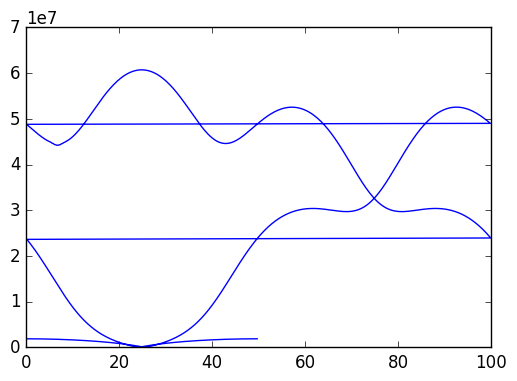

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003BEECB38>

In [40]:
#Field distribution along beam axis
using PyPlot
open(string(Filename,".SFO")) do f
    s = readlines(f)
    LineNumberStart = 0
    LineNumberEnd = 0
    #finding relevant data in output file
    for i=1:length(s)
        m = ismatch(r"Electric field along R =         0.000000", s[i])
        if m == true
            #println(s[i])
            LineNumberStart = i + 4
            
        end
        k = ismatch(r"Total cavity stored energy", s[i])
        if k == true
            #println(s[i])
            LineNumberEnd = i-1 
            
        end
    end 
    Length = LineNumberEnd - LineNumberStart
    Axis= zeros(Length)
    EField = zeros(Length)
    for i = 1:Length
        Axis[i] = parse(Float64,s[LineNumberStart+i][3:10])
        EField[i] = parse(Float64,s[LineNumberStart+i][14:25])
    end
        
    
    fig = figure(figsize=(6,4))
    p=plot(Axis,EField,"b-",)    
    
    #println(LineNumberStart)
    #println(LineNumberEnd)
    #converting partial strings of data in to floating point numbers
end


In [39]:
#Open and run Solution File
run(`C:/LANL/WSFPLOT $(string(Filename,".T35"))`)